## Assingment #1

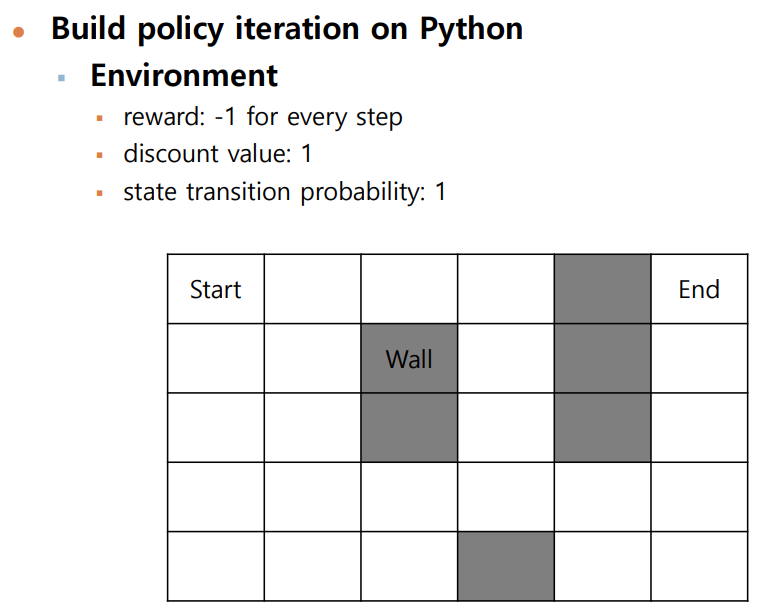

In [ ]:
# Assignment #1

import numpy as np

class GridWorld:
    def __init__(self):
        self.state = np.zeros([5, 6])
        self.action_space = [0, 1, 2, 3] # Up, Down, Left, Right

        self.goal_pos = {'y' : 0, 'x' : 5} # end pos
        self.wall = [(0, 4), (1, 2), (1, 4), (2, 2), (2, 4), (4, 3)] # wall pos

        self.y_min, self.x_min, self.y_max, self.x_max = 0, 0, 4, 5 # max x, y

        self.gamma = 1.0

    def reset(self):
        self.state = np.zeros([5, 6])
        return self.state
    
    def s_next(self, s_t, a_t):
        pos = s_t

        if (a_t == 0):
            pos[0] = max(s_t[0] - 1, self.y_min)
        elif (a_t == 1):
            pos[0] = min(s_t[0] + 1, self.y_max)
        elif (a_t == 2):
            pos[1] = max(s_t[1] - 1, self.x_min)
        elif (a_t == 3):
            pos[1] = min(s_t[1] + 1, self.x_max)
        else:
            assert False, "Invalid action"

        return pos
    
    def reward(self, s_t, a_t, s_next):
        if (s_t[0] == self.goal_pos['y'] and s_t[1] == self.goal_pos['x']):
            reward = 0
        elif (s_t in self.wall):
            reward = -99
        else:
            reward = -1
        return reward

In [ ]:
def policy_evaluation(env, policy):

    delta = 1
    theta = 0.01

    loop_count = 0
    while (delta >= theta):
        delta = 0
        y, x = 5, 6
        new_state = np.zeros((y, x))

        for i in range(1, y*x):
            v_s = 0
            s_t = np.divmod(i, x)
            # if i = 5, then (0, 5) is not update
            if (i == 5):
                continue

            for a_t in env.action_space:
                pi_a = policy[i][a_t]
                p_ss = 1.0
                s_t1 = env.s_next(list(s_t), a_t)
                reward = env.reward(s_t, a_t, s_t1)

                v_s = v_s + pi_a * p_ss * (reward + env.gamma * env.state[s_t1[0], s_t1[1]])
            
            new_state[s_t[0], s_t[1]] = v_s

        value_delta = np.sum(np.abs(new_state - env.state))
        env.state = new_state

        delta = max(delta, value_delta)

        loop_count += 1
        print(f"[{loop_count}] Delta : {delta}")
            
    return env.state

In [92]:
env = GridWorld()
policy = list()

for s in range(30):
    pi = np.array([0.25, 0.25, 0.25, 0.25])
    policy.append(pi)

res = policy_evaluation(env, policy)
print(res.reshape(5, 6))

[1] Delta : 616.0
[2] Delta : 590.5
[3] Delta : 571.375
[4] Delta : 552.3125
[5] Delta : 535.9921875
[6] Delta : 520.279296875
[7] Delta : 505.86767578125
[8] Delta : 492.11376953125
[9] Delta : 479.2396545410156
[10] Delta : 466.9797897338867
[11] Delta : 455.38939666748047
[12] Delta : 444.3332233428955
[13] Delta : 433.807431101799
[14] Delta : 423.73289373517036
[15] Delta : 414.08747638762
[16] Delta : 404.82013729028404
[17] Delta : 395.90581815317273
[18] Delta : 387.3092804985354
[19] Delta : 379.00786754093133
[20] Delta : 370.97612565247255
[21] Delta : 363.1951675795117
[22] Delta : 355.6460482634443
[23] Delta : 348.31354961316674
[24] Delta : 341.1832695373427
[25] Delta : 334.2430995108839
[26] Delta : 327.481904313304
[27] Delta : 320.89005822279927
[28] Delta : 314.4588172797055
[29] Delta : 308.18048135263655
[30] Delta : 302.048075895922
[31] Delta : 296.05537299979676
[32] Delta : 290.1967171656949
[33] Delta : 284.4669992349584
[34] Delta : 278.8615531346994
[35] De

In [ ]:
def policy_improvement(env, policy):
    gamma = 1.0
    y, x = 5, 6

    for i in range(y*x):
        s_t = np.divmod(i, x)
        action_values = np.zeros(len(env.action_space))
        
        for a in env.action_space:

            action_value = 0
            p_s_next = 1.0
            s_next = env.s_next(list(s_t), a)
            reward = env.reward(s_t, a, s_next)

            action_value = p_s_next * (reward + gamma * env.state[s_next[0], s_next[1]])
            action_values[a] = action_value

        a_max = action_values.argmax()

        policy[i][:] = 0
        policy[i][a_max] = 1

    return policy

In [100]:
env = GridWorld()

policy = []
for s in range(30):
    pi = np.array([0.25, 0.25, 0.25, 0.25])
    policy.append(pi)

value_vector = np.zeros(30)
delta = 5
cnt = 0
Delta = 0

while (True):
    env.reset()
    new_value_vector = policy_evaluation(env, policy)
    Delta = 0
    Delta = max(Delta, np.sum(np.abs(new_value_vector[0] - value_vector[0])))

    if (Delta >= delta):
        value_vector = new_value_vector
        policy = policy_improvement(env, policy)
        print(policy)
        cnt += 1
        print(f"[{cnt}] Delta : {Delta}")

    else:
        break

[1] Delta : 616.0
[2] Delta : 590.5
[3] Delta : 571.375
[4] Delta : 552.3125
[5] Delta : 535.9921875
[6] Delta : 520.279296875
[7] Delta : 505.86767578125
[8] Delta : 492.11376953125
[9] Delta : 479.2396545410156
[10] Delta : 466.9797897338867
[11] Delta : 455.38939666748047
[12] Delta : 444.3332233428955
[13] Delta : 433.807431101799
[14] Delta : 423.73289373517036
[15] Delta : 414.08747638762
[16] Delta : 404.82013729028404
[17] Delta : 395.90581815317273
[18] Delta : 387.3092804985354
[19] Delta : 379.00786754093133
[20] Delta : 370.97612565247255
[21] Delta : 363.1951675795117
[22] Delta : 355.6460482634443
[23] Delta : 348.31354961316674
[24] Delta : 341.1832695373427
[25] Delta : 334.2430995108839
[26] Delta : 327.481904313304
[27] Delta : 320.89005822279927
[28] Delta : 314.4588172797055
[29] Delta : 308.18048135263655
[30] Delta : 302.048075895922
[31] Delta : 296.05537299979676
[32] Delta : 290.1967171656949
[33] Delta : 284.4669992349584
[34] Delta : 278.8615531346994
[35] De

In [101]:
np.array(policy)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [103]:
new_value_vector

array([[   0.,   -1.,   -2.,   -3.,  -99.,    0.],
       [  -1.,   -2., -101.,   -4., -100.,   -1.],
       [  -2.,   -3., -102.,   -5., -101.,   -2.],
       [  -3.,   -4.,   -5.,   -5.,   -4.,   -3.],
       [  -4.,   -5.,   -6., -104.,   -5.,   -4.]])